In [2]:
# Import our visualization libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import sklearn

In [3]:
df = pd.read_csv("marketing_campaign.csv", sep="\t")
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

# Content Attributes

## People

* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if the customer complained in the last 2 years, 0 otherwise

## Products

* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years

## Promotion

* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

## Place

* NumWebPurchases: Number of purchases made through the company’s website
* NumCatalogPurchases: Number of purchases made using a catalogue
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to company’s website in the last month

In [4]:
df["TotalAmountSpent"] = df["MntFishProducts"] + df["MntFruits"] + df["MntGoldProds"] + df["MntSweetProducts"] + df["MntMeatProducts"] + df["MntWines"]

In [5]:
from datetime import datetime

In [6]:
df["Age"] = df["Year_Birth"].apply(lambda x : datetime.now().year - x)

In [7]:
df["Age"].describe()

count    2240.000000
mean       54.194196
std        11.984069
min        27.000000
25%        46.000000
50%        53.000000
75%        64.000000
max       130.000000
Name: Age, dtype: float64

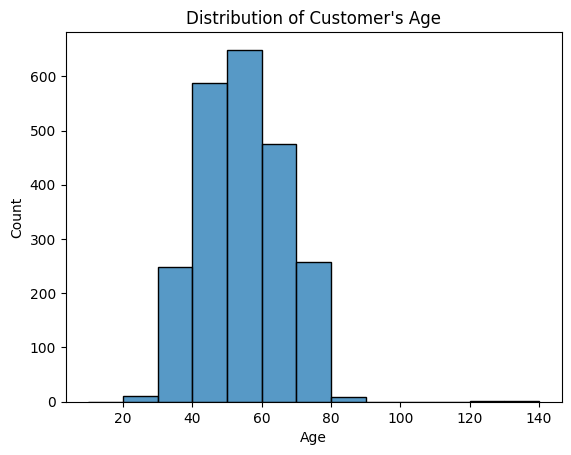

In [8]:
sns.histplot(data=df, x="Age", bins = list(range(10, 150, 10)))
plt.title("Distribution of Customer's Age")
plt.savefig("Age.png");

In [9]:
df["Education"] = df["Education"].replace({"Graduation":"Graduate", "PhD":"Postgraduate", "Master":"Postgraduate", "2n Cycle":"Postgraduate", "Basic":"Undergraduate"})

In [10]:
df["Education"].value_counts()

Graduate         1127
Postgraduate     1059
Undergraduate      54
Name: Education, dtype: int64

In [11]:
df["Education"].unique()

array(['Graduate', 'Postgraduate', 'Undergraduate'], dtype=object)

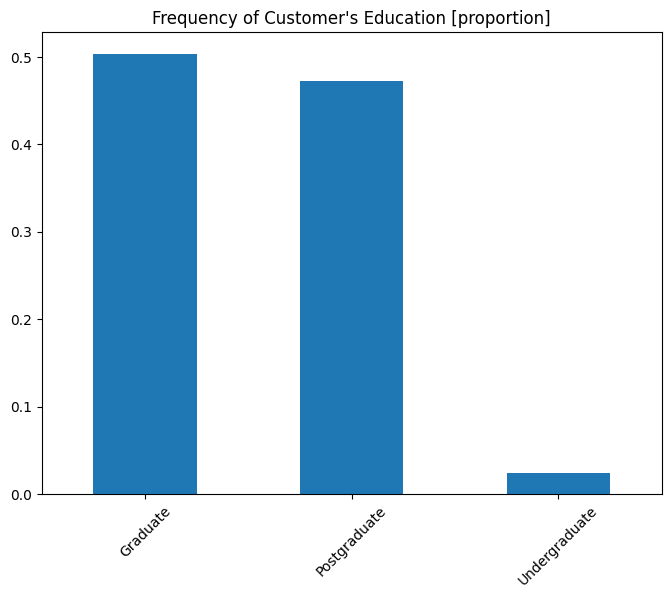

In [12]:
df["Education"].value_counts(normalize=True).plot.bar(figsize=(8, 6))
plt.xticks(rotation=45)
plt.title("Frequency of Customer's Education [proportion]");

In [13]:
df["Marital_Status"].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [14]:
df["Marital_Status"] = df["Marital_Status"].replace({"Together":"Married","Married":"Married", "Absurd":"Single", "Divorced":"Single", "Alone":"Single", "YOLO":"Single", "Widow":"Single"})

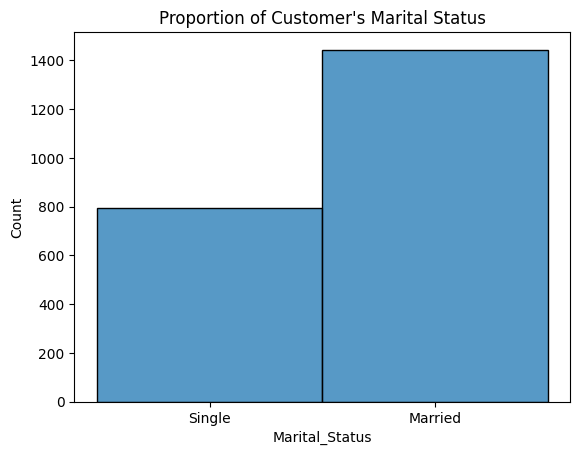

In [15]:
sns.histplot(data=df, x="Marital_Status", binwidth=1)
plt.title("Proportion of Customer's Marital Status");

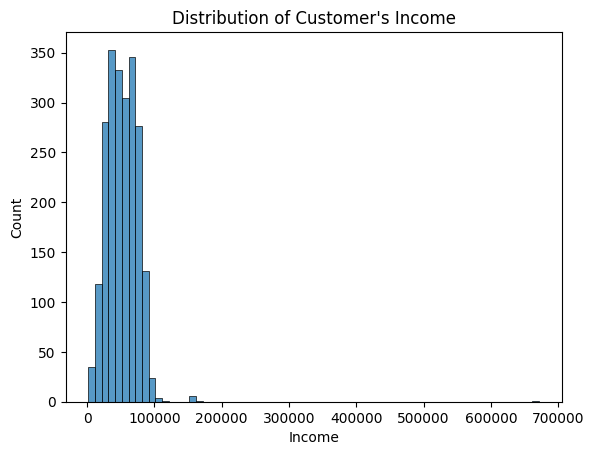

In [16]:
sns.histplot(data=df, x="Income", binwidth=1e4)
plt.title("Distribution of Customer's Income");

In [17]:
df["Kidhome"].unique()

array([0, 1, 2])

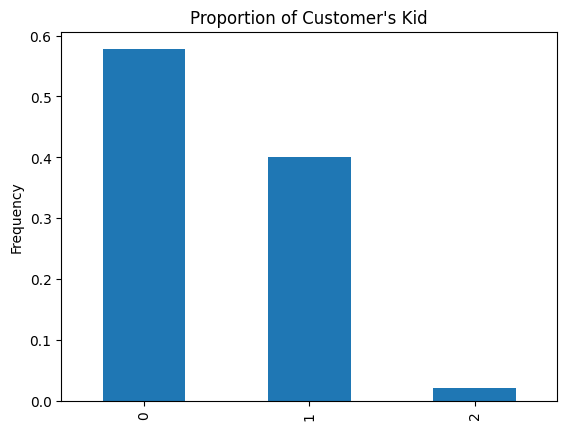

In [18]:
df["Kidhome"].value_counts(normalize=True).plot.bar()
plt.ylabel("Frequency")
plt.title("Proportion of Customer's Kid");

In [19]:
df["Teenhome"].unique()

array([0, 1, 2])

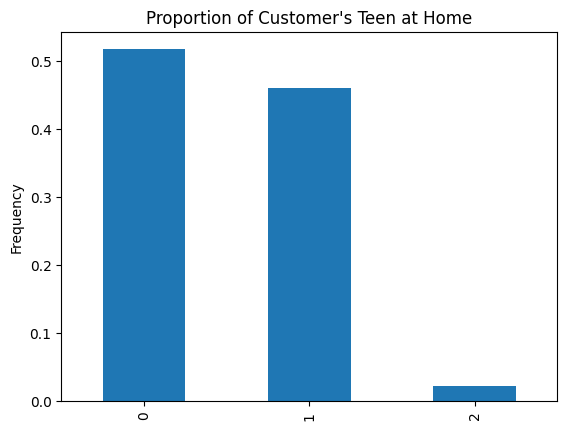

In [20]:
df["Teenhome"].value_counts(normalize=True).plot.bar()
plt.ylabel("Frequency")
plt.title("Proportion of Customer's Teen at Home");

In [21]:
df["Total Children"] = df["Kidhome"] + df["Teenhome"]

In [22]:
df["Total Children"].unique()

array([0, 2, 1, 3])

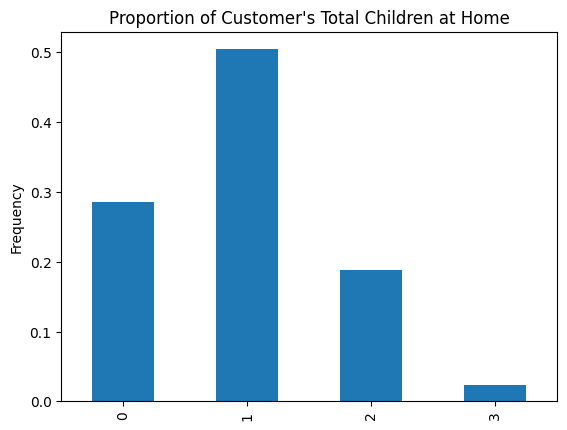

In [23]:
df["Total Children"].value_counts(normalize=True).sort_index().plot.bar()
plt.ylabel("Frequency")
plt.title("Proportion of Customer's Total Children at Home");

In [24]:
df["TotalAmountSpent"].describe()

count    2240.000000
mean      605.798214
std       602.249288
min         5.000000
25%        68.750000
50%       396.000000
75%      1045.500000
max      2525.000000
Name: TotalAmountSpent, dtype: float64

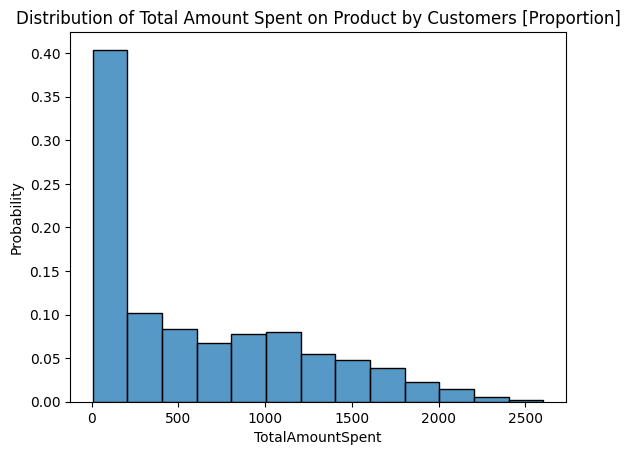

In [25]:
sns.histplot(data=df, x="TotalAmountSpent", binwidth=200, stat="probability")
plt.title("Distribution of Total Amount Spent on Product by Customers [Proportion]");

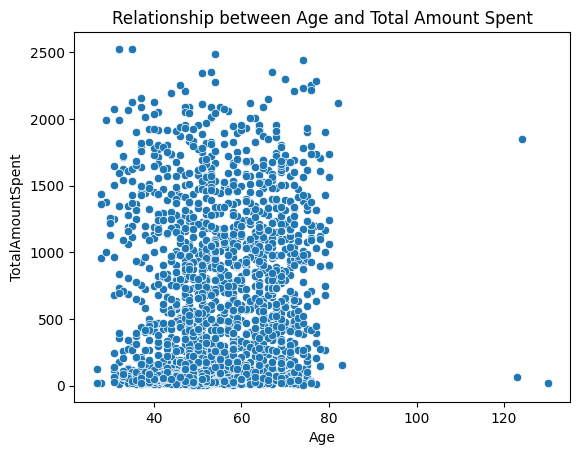

In [26]:
sns.scatterplot(data=df, x="Age", y="TotalAmountSpent")
plt.title("Relationship between Age and Total Amount Spent");

In [26]:
def group_age(age):
    if age <20:
        return "11-20"
    elif age > 20 and age <31:
        return "21-30"
    elif age > 30 and age <41:
        return "31-40"
    elif age > 40 and age <51:
        return "41-50"
    elif age > 50 and age <61:
        return "51-60"
    elif age > 60 and age <71:
        return "61-70"
    elif age > 70 and age <81:
        return "71-80"
    elif age > 80:
        return ">80"

In [27]:
df["Age Group"] =df["Age"].apply(group_age)

# To order plotly index
order = ["11-20","21-30", "31-40", "41-50", "51-60", "61-70", "71-80", ">80"]


In [28]:
mask = df.groupby("Age Group")["TotalAmountSpent"].median()
mask = mask.reset_index()
fig = px.bar(data_frame=mask, x="Age Group", y="TotalAmountSpent", height=500)

annotation = []
for x, y in zip(mask["Age Group"], mask["TotalAmountSpent"]):
    annotation.append(
        dict(x=x, y=y +20,
             text=str(round(y, 2)) + '$',
             font=dict(family='Arial', size=14, color='rgb(66, 99, 236)'), showarrow=False)
    )
fig.update_xaxes(categoryorder='array', categoryarray= order)
fig.update_layout(annotations=annotation)
fig.show()

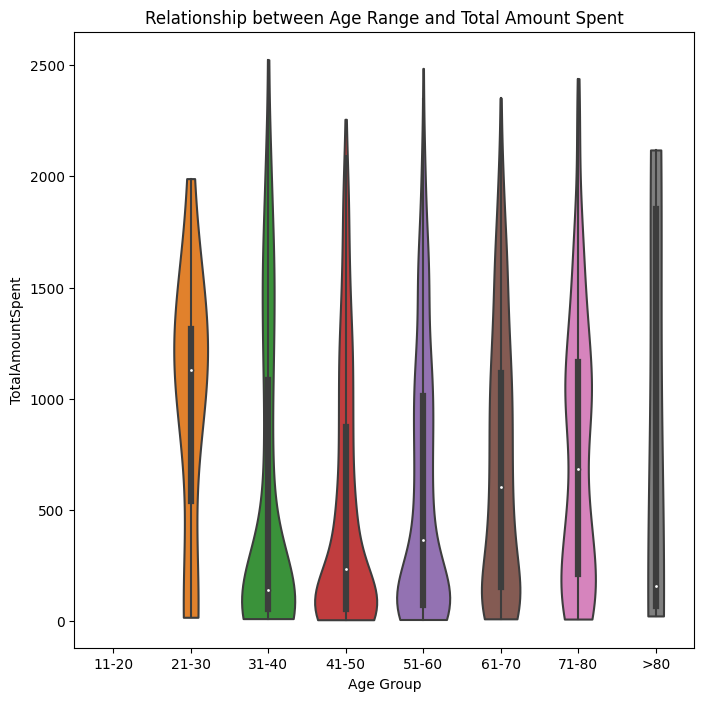

In [29]:
plt.figure(figsize=(8, 8))
sns.violinplot(x="Age Group", y="TotalAmountSpent", data=df, cut=0, order=order)
plt.title("Relationship between Age Range and Total Amount Spent");

In [30]:
from scipy.stats import iqr

In [31]:
iqr = iqr(df["Income"], nan_policy="omit")


low = np.nanquantile(df["Income"], 0.25) - 1.5 * iqr
high = np.nanquantile(df["Income"], 0.75) + 1.5 * iqr

In [32]:
df_cut = df[df["Income"].between(low, high)]

In [33]:
mask = df_cut.groupby("Age Group")["Income"].mean()
mask = mask.reset_index()
fig = px.bar(data_frame=mask, x="Age Group", y="Income", height=500)

annotation = []
for x, y in zip(mask["Age Group"], mask["Income"]):
    annotation.append(
        dict(x=x, y=y +5000,
             text=str(round(y, 2)) + '$',
             font=dict(family='Arial', size=14, color='rgb(66, 99, 236)'), showarrow=False)
    )
fig.update_xaxes(categoryorder='array', categoryarray= ["21-30", "31-40"])
fig.update_layout(annotations=annotation)
fig.show()

In [34]:
(df_cut[df_cut["Age Group"] == "21-30"]["Income"]).describe()

count       15.000000
mean     63576.866667
std      26909.456211
min       7500.000000
25%      52669.500000
50%      74293.000000
75%      80375.500000
max      95529.000000
Name: Income, dtype: float64

In [35]:

mask = df.groupby("Education")["TotalAmountSpent"].median()
mask = mask.reset_index()
fig = px.bar(data_frame=mask, x="Education", y="TotalAmountSpent", height=500,
            title = "Relationsip Between Education and Total Amount Spent [Average Spent]")

annotation = []
for x, y in zip(mask["Education"], mask["TotalAmountSpent"]):
    annotation.append(
        dict(x=x, y=y +20,
             text=str(round(y, 2)) + '$',
             font=dict(family='Arial', size=14, color='rgb(66, 99, 236)'), showarrow=False)
    )
fig.update_xaxes(categoryorder='array', categoryarray= order)
fig.update_layout(annotations=annotation)
fig.show()

In [36]:
mask = df_cut.groupby("Education")["Income"].mean()
mask = mask.reset_index()
fig = px.bar(data_frame=mask, x="Education", y="Income", height=500,
            title = "Relationsip Between Customer's Education Level and Income [Average Income]")

annotation = []
for x, y in zip(mask["Education"], mask["Income"]):
    annotation.append(
        dict(x=x, y=y +1500,
             text=str(round(y, 2)) + '$',
             font=dict(family='Arial', size=14, color='rgb(66, 99, 236)'), showarrow=False)
    )
fig.update_xaxes(categoryorder='array', categoryarray= order)
fig.update_layout(annotations=annotation)

fig.show()

In [37]:
mask = df.groupby("Marital_Status")["TotalAmountSpent"].median()
mask = mask.reset_index()
fig = px.bar(data_frame=mask, x="Marital_Status", y="TotalAmountSpent", height=500, 
             title="Relationship between Customer's Marital Status and Total Amount Spent [Average Spent]")

annotation = []
for x, y in zip(mask["Marital_Status"], mask["TotalAmountSpent"]):
    annotation.append(
        dict(x=x, y=y +50,
             text=str(round(y, 2)) + '$',
             font=dict(family='Arial', size=14, color='rgb(66, 99, 236)'), showarrow=False)
    )
fig.update_xaxes(categoryorder='array', categoryarray= ["21-30", "31-40"])
fig.update_layout(annotations=annotation)
fig.show()

In [38]:
mask = df_cut.groupby("Marital_Status")["Income"].mean()
mask = mask.reset_index()
fig = px.bar(data_frame=mask, x="Marital_Status", y="Income", height=500, 
             title="Relationship between Customer's Marital Status and Income [Average Income]")

annotation = []
for x, y in zip(mask["Marital_Status"], mask["Income"]):
    annotation.append(
        dict(x=x, y=y +5000,
             text=str(round(y, 2)) + '$',
             font=dict(family='Arial', size=14, color='rgb(66, 99, 236)'), showarrow=False)
    )
fig.update_xaxes(categoryorder='array', categoryarray= ["21-30", "31-40"])
fig.update_layout(annotations=annotation)
fig.show()

In [39]:
df["Kidhome"].value_counts()

0    1293
1     899
2      48
Name: Kidhome, dtype: int64

In [40]:
mask = df.groupby("Kidhome")["TotalAmountSpent"].median()
mask = mask.reset_index()
fig = px.bar(data_frame=mask, x="Kidhome", y="TotalAmountSpent", height=500, 
             title="Relationship between Customer's Kid and Amount Spent [Average]")

annotation = []
for x, y in zip(mask["Kidhome"], mask["TotalAmountSpent"]):
    annotation.append(
        dict(x=x, y=y +50,
             text=str(round(y, 2)) + '$',
             font=dict(family='Arial', size=14, color='rgb(66, 99, 236)'), showarrow=False)
    )
fig.update_xaxes(categoryorder='array', categoryarray= ["21-30", "31-40"])
fig.update_layout(annotations=annotation)
fig.show()

In [41]:
mask = df_cut.groupby("Kidhome")["Income"].mean()
mask = mask.reset_index()
fig = px.bar(data_frame=mask, x="Kidhome", y="Income", height=500, title="Relationship between Marital Status and Total Amount Spent")

annotation = []
for x, y in zip(mask["Kidhome"], mask["Income"]):
    annotation.append(
        dict(x=x, y=y +5000,
             text=str(round(y, 2)) + '$',
             font=dict(family='Arial', size=14, color='rgb(66, 99, 236)'), showarrow=False)
    )
fig.update_xaxes(categoryorder='array', categoryarray= ["21-30", "31-40"])
fig.update_layout(annotations=annotation)
fig.show()

In [42]:
mask = df.groupby("Teenhome")["TotalAmountSpent"].median()
mask = mask.reset_index()
fig = px.bar(data_frame=mask, x="Teenhome", y="TotalAmountSpent", height=500, title="Relationship between Marital Status and Total Amount Spent")

annotation = []
for x, y in zip(mask["Teenhome"], mask["TotalAmountSpent"]):
    annotation.append(
        dict(x=x, y=y +50,
             text=str(round(y, 2)) + '$',
             font=dict(family='Arial', size=14, color='rgb(66, 99, 236)'), showarrow=False)
    )
fig.update_layout(annotations=annotation)
fig.show()

In [43]:
mask = df_cut.groupby("Teenhome")["Income"].mean()
mask = mask.reset_index()
fig = px.bar(data_frame=mask, x="Teenhome", y="Income", height=500, title="Relationship between Marital Status and Total Amount Spent")

annotation = []
for x, y in zip(mask["Teenhome"], mask["Income"]):
    annotation.append(
        dict(x=x, y=y +5000,
             text=str(round(y, 2)) + '$',
             font=dict(family='Arial', size=14, color='rgb(66, 99, 236)'), showarrow=False)
    )
fig.update_layout(annotations=annotation)
fig.show()

In [44]:
mask = df.groupby("Total Children")["TotalAmountSpent"].median()
mask = mask.reset_index()
fig = px.bar(data_frame=mask, x="Total Children", y="TotalAmountSpent", height=500,
             title="Relationship between Marital Status and Amount Spent [Average Spent]")

annotation = []
for x, y in zip(mask["Total Children"], mask["TotalAmountSpent"]):
    annotation.append(
        dict(x=x, y=y +50,
             text=str(round(y, 2)) + '$',
             font=dict(family='Arial', size=14, color='rgb(66, 99, 236)'), showarrow=False)
    )
fig.update_layout(annotations=annotation)
fig.show()

In [45]:
fig = px.scatter(data_frame=df_cut, x="Income",
                 y="TotalAmountSpent", title="Relationship Between Customer's Income and Total Amount Spent",
                height=500,
                color_discrete_sequence = px.colors.qualitative.G10[1:])
fig.show()

In [46]:
fig = px.scatter(
    data_frame=df_cut,
    x = "Income",
    y= "TotalAmountSpent",
    title = "Relationship between Income VS Total Amount Spent Based on Education",
    color = "Education",
    height=500
)
fig.show()

In [47]:
fig = px.scatter(
    data_frame=df_cut,
    x = "Income",
    y= "TotalAmountSpent",
    title = "Relationship between Income VS Total Amount Spent Based on Education",
    color = "Total Children",
    height=500
)
fig.show()

# Building the KMeans Model

We will build the Kmeans Model using two Features to Segment the Customers Demographic and Behaviour "Income" and "Total Amount Spent"

In [48]:
import sklearn

In [49]:
df["Income"].fillna(df["Income"].median(), inplace=True)

In [50]:
data = df[["Income", "TotalAmountSpent"]]

In [51]:
df_log = np.log(data)

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [53]:
std_scaler = StandardScaler()
df_scaled = std_scaler.fit_transform(df_log)

In [54]:
errors = []
for k in range(1, 11):
    model = KMeans(n_clusters=k,n_init=10,random_state=42)
    model.fit(df_scaled)
    errors.append(model.inertia_)

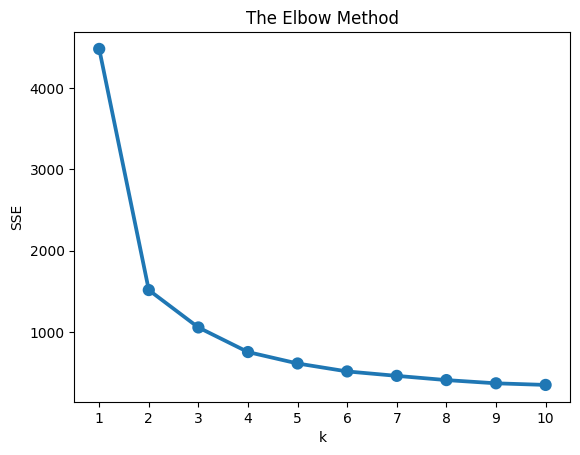

In [55]:
plt.title('The Elbow Method')
plt.xlabel('k'); plt.ylabel('SSE')
sns.pointplot(x=list(range(1, 11)), y=errors)
plt.savefig("Elbow.png")

In [56]:
%pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [57]:
from kneed import KneeLocator
kl = KneeLocator(x = range(1, 11),
                 y = errors,
                 curve="convex",
                 direction="decreasing")
print('The optimum number of clusters is: ' + str(kl.elbow))

The optimum number of clusters is: 3


In [58]:
model = KMeans(n_clusters=3,n_init=10, random_state=42)
model.fit(df_scaled)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [59]:
data = data.assign(ClusterLabel= model.labels_)
data.groupby("ClusterLabel")[["Income", "TotalAmountSpent"]].median()

Income  TotalAmountSpent
ClusterLabel                           
0             25261.5              43.0
1             69084.0            1069.5
2             42641.0             145.0

In [60]:
fig = px.scatter(
    data_frame=data,
    x = "Income",
    y= "TotalAmountSpent",
    title = "Relationship between Income VS Total Amount Spent",
    color = "ClusterLabel",
    height=500
)
fig.show()

# Building The Kmeans Model with Three Features

In [61]:
data = df[["Age", "Income", "TotalAmountSpent"]]

In [62]:
df_log = np.log(data)
std_scaler = StandardScaler()
df_scaled = std_scaler.fit_transform(df_log)


In [63]:
sse = {}
for k in range(1, 11):
    model = KMeans(n_clusters=k,n_init=10, random_state=42)
    model.fit(df_scaled)
    sse[k] = model.inertia_

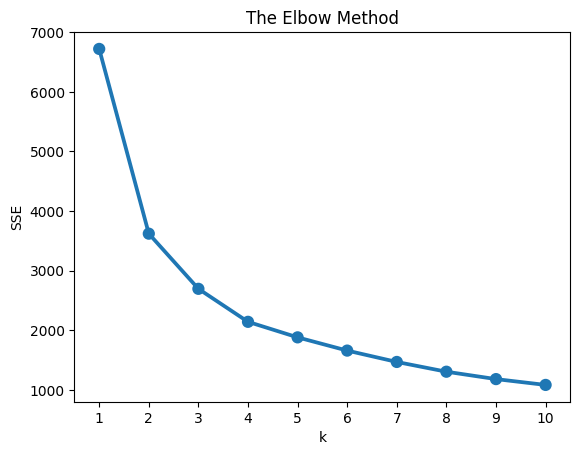

In [64]:
plt.title('The Elbow Method')
plt.xlabel('k'); plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [65]:
model = KMeans(n_clusters=3,n_init=10,random_state=42)
model.fit(df_scaled)


data = data.assign(ClusterLabel= model.labels_)

In [66]:
result = data.groupby("ClusterLabel").agg({"Age":"mean", "Income":"median", "TotalAmountSpent":"median"}).round()
result

Age   Income  TotalAmountSpent
ClusterLabel                                 
0             50.0  31801.0              54.0
1             45.0  67402.0            1001.0
2             66.0  62814.0             822.0

## Visualizing The Result

In [67]:
fig = px.scatter_3d(data_frame=data, x="Income", 
                    y="TotalAmountSpent", z="Age", color="ClusterLabel", height=550,
                   title = "Visualizing Cluster Result Using 3 Features")
fig.show()

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

feature_columns = ["NumDealsPurchases", "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5"]
X = df[feature_columns]
y = df['Response']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test_scaled)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)
print(classification_report(y_test, y_pred))

Accuracy:  0.8459821428571429
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       379
           1       0.50      0.16      0.24        69

    accuracy                           0.85       448
   macro avg       0.68      0.57      0.58       448
weighted avg       0.81      0.85      0.81       448



In [69]:
!pip install imbalanced-learn

In [70]:
from imblearn.over_sampling import SMOTE

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

logreg = LogisticRegression()
logreg.fit(X_train_smote, y_train_smote)

y_pred = logreg.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy:  0.7946428571428571
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       577
           1       0.34      0.48      0.40        95

    accuracy                           0.79       672
   macro avg       0.62      0.66      0.64       672
weighted avg       0.83      0.79      0.81       672



In [72]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the XGBoost classifier
xgb = XGBClassifier(random_state=42)

# Define the hyperparameter search space
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 500, 1000],
    'subsample': [0.5, 0.75, 1],
    'colsample_bytree': [0.5, 0.75, 1],
}

# Perform a grid search over the hyperparameter space using 5-fold cross-validation
grid_search = GridSearchCV(xgb, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_smote, y_train_smote)

# Print the best hyperparameters
print('Best hyperparameters:', grid_search.best_params_)

# Train the XGBoost classifier with the best hyperparameters
best_xgb = grid_search.best_estimator_
best_xgb.fit(X_train_smote, y_train_smote)

# Evaluate the XGBoost classifier on the test set
y_pred = best_xgb.predict(X_test)
print(classification_report(y_test, y_pred))

Best hyperparameters: {'colsample_bytree': 1, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.5}
              precision    recall  f1-score   support

           0       0.90      0.85      0.88       577
           1       0.33      0.45      0.38        95

    accuracy                           0.79       672
   macro avg       0.62      0.65      0.63       672
weighted avg       0.82      0.79      0.81       672



In [73]:
from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, scoring='f1', cv=5, n_jobs=-1)
grid_search_rf.fit(X_train_smote, y_train_smote)

best_params_rf = grid_search_rf.best_params_
print("Best hyperparameters for Random Forest:", best_params_rf)

rf_best = RandomForestClassifier(**best_params_rf, random_state=42)
rf_best.fit(X_train_smote, y_train_smote)
y_pred_rf = rf_best.predict(X_test)

print(classification_report(y_test, y_pred_rf))

Best hyperparameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 500}
              precision    recall  f1-score   support

           0       0.90      0.85      0.88       577
           1       0.34      0.45      0.39        95

    accuracy                           0.80       672
   macro avg       0.62      0.65      0.63       672
weighted avg       0.82      0.80      0.81       672

